In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [32]:
path = "myData\myData" 
labelFile = 'labels.csv' 
batch_size_val=50  
steps_per_epoch_val=len(X_train)//batch_size_val
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2   
validationRatio = len(X_test)//batch_size_val

In [5]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [7]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


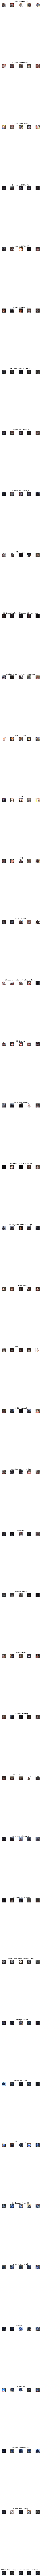

In [8]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[106, 1280, 1276, 793, 1129, 1062, 235, 838, 813, 849, 1141, 753, 1198, 1246, 424, 338, 226, 629, 726, 126, 181, 172, 217, 287, 154, 847, 333, 132, 310, 151, 253, 462, 140, 385, 239, 661, 205, 124, 1191, 179, 194, 140, 126]


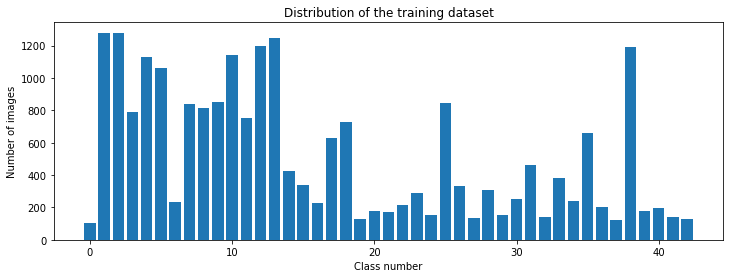

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [10]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)     
    img = img/255           
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [11]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 

In [12]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)
 

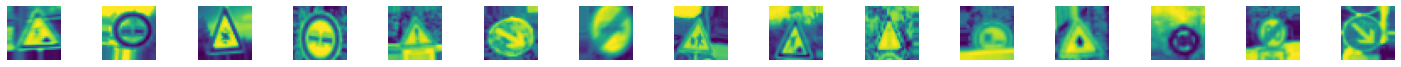

In [14]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [34]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) 
                         
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  
    no_Of_Nodes = 500   
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu'))) 
    model.add(MaxPooling2D(pool_size=size_of_pool)) 
    
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(noOfClasses,activation='softmax')) 
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [35]:
model = myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 30)         

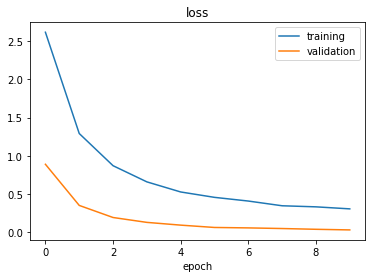

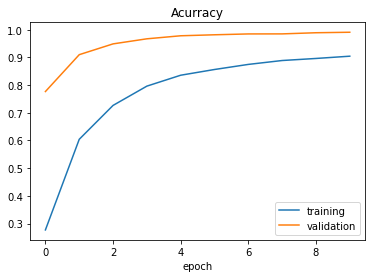

Test Score: 0.0379878394305706
Test Accuracy: 0.9892241358757019


In [36]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [45]:
from keras.models import save_model
model.save('road saftey\RoadSignModel')

INFO:tensorflow:Assets written to: road saftey\RoadSignModel\assets


In [127]:
import tensorflow as tf
image = cv2.imread("test123.png")
image2 = preprocessing(image)
newimg= np.array(image2).reshape(-1,32,32,1)
predictions = model.predict(newimg)
d=np.argmax(predictions)
data['Name'][d]

'Speed limit (30km/h)'

In [158]:
import pyttsx3
engine = pyttsx3.init()
voice = engine.getProperty('voices')
engine.setProperty('voice', voice[1].id)
engine.setProperty('rate',150)
engine.setProperty('volume', 100.0)
engine.say(data['Name'][d])
engine.runAndWait()